In [35]:
import pandas as pd
import numpy as np
import h5py

# load data
df = pd.read_csv (r'data/raw_data/funding_data.csv')

# replace + and - so they are coded as missing
df = df.replace('+', np.NaN, regex=False)
df = df.replace('-', np.NaN, regex=False)
df = df.replace('*', np.NaN, regex=False)

# Export the pandas DataFrame into HDF5
h5File = "data/cleaned_data/funding_data.hdf5";
df.to_hdf(h5File, "/data/cleaned_data");

/srv/conda/envs/notebook/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['research_category', '2008', '2009', '2009_ARRA', '2010', '2010_ARRA',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021_Estimated', '2022_Estimated', '2019_US_Mortality_19',
       '2019_US_Prevalence_SE_19'],
      dtype='object')]

  pytables.to_hdf(


In [36]:
# Use pandas again to read data from the hdf5 file to the pandas DataFrame
df = pd.read_hdf(h5File, "/data/cleaned_data");

In [37]:
data2019 = df[["research_category", "2019"]]

data2019['2019'] = data2019['2019'].replace('[\$,]', '', regex=True).astype(float)

datatop10 = data2019.sort_values("2019", ascending=False)[:10]
datatop10

/tmp/ipykernel_220/4231864846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2019['2019'] = data2019['2019'].replace('[\$,]', '', regex=True).astype(float)


,research_category,2019
60,Clinical Research,15868.0
114,Genetics,9864.0
225,Prevention,9485.0
188,Neurosciences,9468.0
33,Biotechnology,7219.0
36,Brain Disorders,6954.0
41,Cancer,6520.0
29,Behavioral and Social Science,6499.0
142,Infectious Diseases,6313.0
61,Clinical Trials and Supportive Activities 17,6058.0


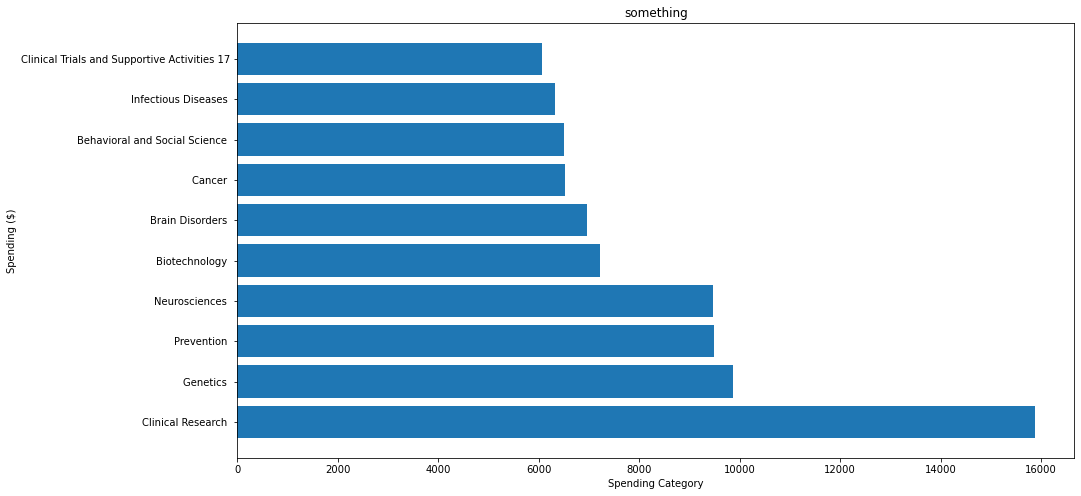

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

ax.barh(datatop10["research_category"],datatop10["2019"])
ax.set_title("something")
ax.set_xlabel("Spending Category")
ax.set_ylabel("Spending ($)");


In [40]:
def draw_barchart(year):
    
    datayear = df[["research_category", year]]
    
    datayear[year] = datayear[year].replace('[\$,]', '', regex=True).astype(float)
    datayeartop10 = datayear.sort_values(year, ascending=False)[:10]
    
    fig, ax = plt.subplots(figsize=(15, 8))

    ax.barh(datayeartop10["research_category"],datayeartop10[year])
    ax.set_title("Top 10 Spending Categories in )
    ax.set_xlabel("Spending Category")
    ax.set_ylabel("Spending ($)")
    ax.grid(which='major', axis='x', linestyle='-');
    


/tmp/ipykernel_220/3127575906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datayear[year] = datayear[year].replace('[\$,]', '', regex=True).astype(float)


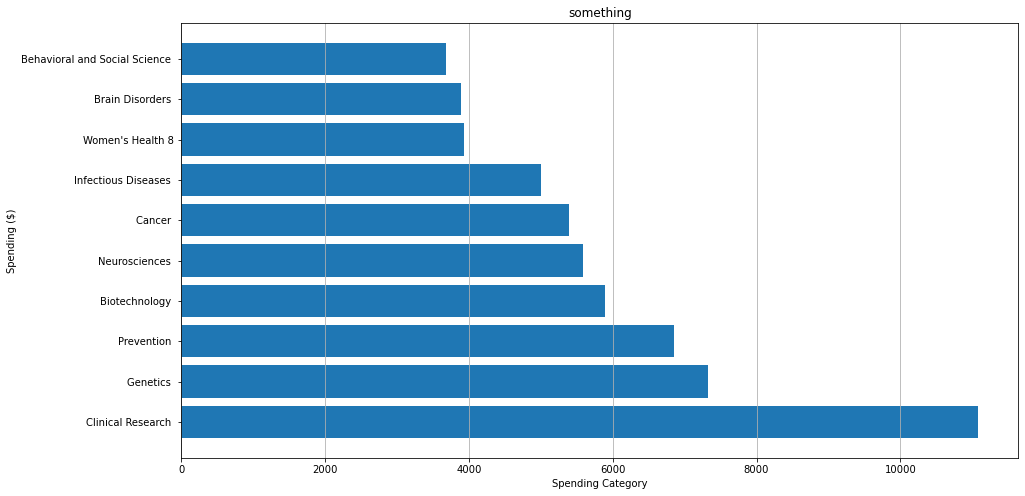

In [41]:
draw_barchart('2014')